In [1]:
from sympy import *
from syscirc.plot import plotcont
from syscirc.components import *
from syscirc.symbolics import *

TypeError: Could not evaluate 5*exp(-0.0301507537688442*pi*im(ω)/ω)*cos(0.0301507537688442*pi*re(ω)/ω) to float. Stopped resolving at 5*exp(-0.0301507537688442*pi*im(ω)/ω)*cos(0.0301507537688442*pi*re(ω)/ω)

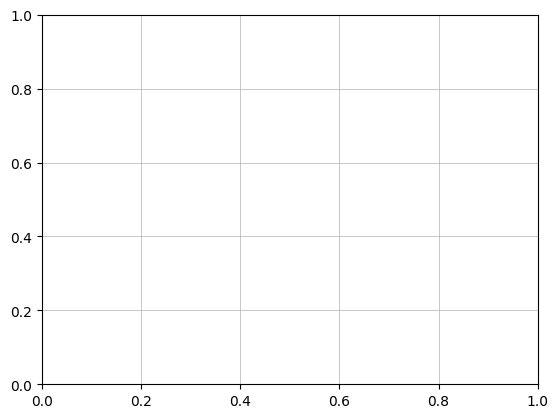

In [2]:
t = Symbol("t", real=True)

ω = Known("ω")
A = Known("A")
ϕ = Known("ϕ")
Vg = Known("V_g", A*exp(1j*(ω*t+ϕ)))
vg = Known("v_g", re(Vg))
I = Known("I")

R1 = Resistor(Known("R", 1), "R", I=I)
C = Capacitor(Known("C", 1), ω, name="C", I=I)
L = Inductor(Known("L", 1), ω, name="L", I=I)

plotcont([re(Vg), re(5*exp(1j*ω*t))+0.1], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t, {})

In [ ]:
V_i = Symbol("V_e") #5*sin(2*pi*t)-2*cos(2*pi*t)

In [ ]:
Z_R, Z_L, Z_C = symbols("Z_R Z_L Z_C") #1, 1j*2*pi, 1/(1j*2*pi)

In [ ]:
i = Symbol("i")
V_loop1 = Z_R*i + Z_L*i + Z_C*i - V_i

In [ ]:
V_loop1.simplify()
solve(V_loop1, V_i)[0]

i*(Z_C + Z_L + Z_R)

In [ ]:
solve(V_loop1, i)[0]

V_e/(Z_C + Z_L + Z_R)

In [ ]:
V_C = solve(V_loop1, i)[0]*Z_C
V_C

V_e*Z_C/(Z_C + Z_L + Z_R)

In [ ]:
V_i = 5*sin(2*pi*t)-2*cos(2*pi*t)
V_i

5*sin(2*pi*t) - 2*cos(2*pi*t)

In [ ]:
V_C = V_C.subs({Z_R:1, Z_L:1j*2*pi, Z_C:1/(1j*2*pi)})
v_C = re(V_C)
v_C

0.5*im(V_e/(1 - 0.5*I/pi + 2.0*I*pi))/pi

TypeError: Could not evaluate 0.5*im(V_e/(1 - 0.5*I/pi + 2.0*I*pi))/pi to float. Stopped resolving at 0.5*im(V_e/(1 - 0.5*I/pi + 2.0*I*pi))/pi

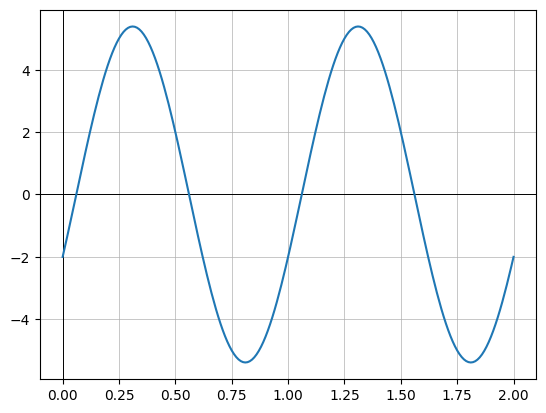

In [ ]:
plotcont([V_i, v_C], [0, 2], 0.01, vars=[t, t], V_i = 5*sin(2*pi*t)-2*cos(2*pi*t))